# Load dependencies

In [1]:
import soundfile as sf
import glob # for listing file given directory & pattern
import numpy as np
import itertools
import argparse as ap
import FastICA as fastica

import pandas as pd
import matplotlib.pyplot as plt

/Users/johnnoelvictorino/.pyenv/versions/3.7.4/envs/cocktail-party-problem/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/johnnoelvictorino/.pyenv/versions/3.7.4/envs/cocktail-party-problem/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Mixing

## Define arguments

In [2]:
category1 = 'speech'
category2 = 'speech'
mix_rate = 0.7

## Load file path

In [3]:
# Returns total number of of audio files in first category's folder
# Note: variable interpolation in string works in Python >3.6
category1_files = glob.glob(
    f'./sounds/{category1}/*.flac'
)
# Returns total number of of audio files in second category's folder
category2_files = glob.glob(
    f'./sounds/{category2}/*.flac'
)
# Returns total number of of audio files in mixed folder (this should start with 0)
mix_count = len(
    glob.glob(
        './sounds/mixed/*.flac'
    )
)

In [4]:
category1_files

['./sounds/speech/speech1.flac',
 './sounds/speech/speech0.flac',
 './sounds/speech/speech3.flac',
 './sounds/speech/speech2.flac',
 './sounds/speech/speech4.flac']

In [5]:
category2_files

['./sounds/speech/speech1.flac',
 './sounds/speech/speech0.flac',
 './sounds/speech/speech3.flac',
 './sounds/speech/speech2.flac',
 './sounds/speech/speech4.flac']

In [6]:
mix_count

40

## Define mix_sounds & bring_equal_length
$$
mixed\_sound = \textit{audio_data1} * \textit{weight1} + \textit{audio_data2} * \textit{weight2}
$$

where:

* *audio_data1*, *audio_data2*: audio data to be mixed
* *weight1*, *weight2*: distance of audio data from mic

Example:

The first sound source is 0.8 meters from the microphone, while the second sound file is 0.2 meters from the microphone.

The mixed sound file output from the function combine sounds at this rate.

In [7]:
def mix_sounds(data1, data2, weight1, weight2):
    """ Mixes the two given sound data at the given mixing ratios.
    Creates a mixed audio file similar to the relationship of the
    sound sources in the cocktail party problem to the microphones.

    For example the first sound source is 0.8 meters from the microphone,
    the second sound file is 0.2 meters from the microphone. The mixed
    sound file output from the function combine sounds at this rate.
    The sound that is so distant is a noise for this microphone.

    Args:
        data1 (numpy.ndarray): the first sound data.
        data2 (numpy.ndarray): the second sound data.
        weight1       (float): the weight of the first sound data.
        weight2       (float): the weight of the second sound data.
    Returns:
        mixed_sound (numpy.ndarray): the mix sound data.
    """
    mixed_sound = data1 * weight1 + data2 * weight2
    return mixed_sound

In [8]:
def bring_equal_length(data1, data2, by='max'):
    """ Brings the audio data of two different
    lengths between the two to the minimum or maximum (default) length.

    For example, sound1 is 23 second, sound2 is 30 second.
    This function returns both sounds 30 seconds long, for maximum length with 0 padding or
    both sounds 23 seconds long, for minimum length
    (minimum one).

    Args:
        data1 (numpy.ndarray): the first sound data.
        data2 (numpy.ndarray): the second sound data.
        by    (str)          : adjust data based on minimum (min) or maximum (max, default) length
    Returns:
        data1 (numpy.ndarray): the first data in the new length.
        data2 (numpy.ndarray): the second data in the new length.
    """
    
    if by == 'max':
        data1, data2 = np.array(list(itertools.zip_longest(
            category1_file, category2_file,
            fillvalue = 0
        ))).T
    elif by == 'min':
        min_length = min(data1.shape[0], data2.shape[0])
        data1 = data1[0:min_length]
        data2 = data2[0:min_length]
    else:
        raise ValueError("by must be 'min' or 'max'")
    return data1, data2

## Mix audio files
Mixing audio files will be done like this...

In [ ]:
# Note: This cell is for explanation and testing purposes
files = [(x, y) for x, y in itertools.product(category1_files, category2_files) if x != y]
category1_filename, category2_filename = files[0]
data1, sample_rate1 = sf.read(category1_filename)
data2, sample_rate2 = sf.read(category2_filename)
files

Mixing two audio files will be done twice.

$$
\textit{mixed_sound1} = \textit{audio_data1} * \textit{weight1} + \textit{audio_data2} * \textit{weight2}
$$

$$
\textit{mixed_sound2} = \textit{audio_data2} * \textit{weight1} + \textit{audio_data1} * \textit{weight2}
$$


If mixing audio files to itself, it will produce `(n * n - n) * 2` files.

For example, if there are **5** audio files `(n = 5)` and it will be mixed with itself,
the total mixed files will be **40**.


In [ ]:
# if category1 == category2 i.e., trying to mix the same category to itself
for category1_filename, category2_filename in itertools.product(category1_files, category2_files):
    if category1_filename != category2_filename:
        category1_file, sample_rate1 = sf.read(category1_filename)
        category2_file, sample_rate2 = sf.read(category2_filename)
        category1_file, category2_file = bring_equal_length(category1_file, category2_file)
        mix1 = mix_sounds(category1_file, category2_file, mix_rate, 1 - mix_rate)
        mix2 = mix_sounds(category2_file, category1_file, mix_rate, 1 - mix_rate)
        sf.write(f'./sounds/mixed/mixed{str(mix_count)}.flac', mix1, sample_rate1)
        sf.write(f'./sounds/mixed/mixed{str(mix_count + 1)}.flac', mix2, sample_rate2)
        mix_count += 2

In [9]:
# Note: This cell is for explanation and testing purposes
sorted(glob.glob(
    f'./sounds/mixed/*.flac'
))

['./sounds/mixed/mixed0.flac',
 './sounds/mixed/mixed1.flac',
 './sounds/mixed/mixed10.flac',
 './sounds/mixed/mixed11.flac',
 './sounds/mixed/mixed12.flac',
 './sounds/mixed/mixed13.flac',
 './sounds/mixed/mixed14.flac',
 './sounds/mixed/mixed15.flac',
 './sounds/mixed/mixed16.flac',
 './sounds/mixed/mixed17.flac',
 './sounds/mixed/mixed18.flac',
 './sounds/mixed/mixed19.flac',
 './sounds/mixed/mixed2.flac',
 './sounds/mixed/mixed20.flac',
 './sounds/mixed/mixed21.flac',
 './sounds/mixed/mixed22.flac',
 './sounds/mixed/mixed23.flac',
 './sounds/mixed/mixed24.flac',
 './sounds/mixed/mixed25.flac',
 './sounds/mixed/mixed26.flac',
 './sounds/mixed/mixed27.flac',
 './sounds/mixed/mixed28.flac',
 './sounds/mixed/mixed29.flac',
 './sounds/mixed/mixed3.flac',
 './sounds/mixed/mixed30.flac',
 './sounds/mixed/mixed31.flac',
 './sounds/mixed/mixed32.flac',
 './sounds/mixed/mixed33.flac',
 './sounds/mixed/mixed34.flac',
 './sounds/mixed/mixed35.flac',
 './sounds/mixed/mixed36.flac',
 './sounds/m

# Separating

## Define argument

In [10]:
mixed_file_number = 0

## Find pair of mixed files
Since individual audio files are mixed twice, we need to get pair of mixed file.

Please refer to [Mix audio files](#Mix-audio-files)

For example, if `mixed_file_number` is **0**, 
1. Check if mixed_file_number is odd or even.
2. Return pair of mixed files.
    1. If **even**, return `mixed0.flac` and `mixed1.flac`.
    2. If **odd** (if `mixed_file_number` is **1**), return `mixed0.flac` and `mixed1.flac`.

In [11]:
def find_pair_of_mixed_file(mixed_file_number):
    """ Returns pair of mixed files from the mix folder, based on mixed_file_number
    Note: Since individual audio files are mixed in combination, we need to get pair of mixed file.
    For example, audio1 & audio2 are mixed. This will produce the following:
        audio1 * weight1 + audio2 * weight2
        audio2 * weight1 + audio1 * weight2

    For example, if mixed_file_number is 0, this will check if mixed_file_number is odd or even.
    If even, it will return mixed0.flac and mixed1.flac.
    If odd (given mixed_file_number 1), it will return mixed0.flac and mixed1.flac

    Args:
        mixed_file_number (int): mix file number to separate
    Returns:
        mixed_data1 (numpy.ndarray): audio file of first combination
        mixed_data2 (numpy.ndarray): audio file of second combination
        sample_rate1 (int): sampling rate of mixed_data1
        sample_rate2 (int): sampling rate of mixed_data2
    """
    if mixed_file_number % 2 == 0:
        filename1 = f'./sounds/mixed/mixed{str(mixed_file_number)}.flac'
        filename2 = f'./sounds/mixed/mixed{str(mixed_file_number + 1)}.flac'
        mixed_data1, sample_rate1 = sf.read(filename1)
        mixed_data2, sample_rate2 = sf.read(filename2)
    else:
        filename1 = f'./sounds/mixed/mixed{str(mixed_file_number - 1)}.flac'
        filename2 = f'./sounds/mixed/mixed{str(mixed_file_number)}.flac'
        mixed_data1, sample_rate1 = sf.read(filename1)
        mixed_data2, sample_rate2 = sf.read(filename2)
    print(f'Returning {filename1} and {filename2}')
    return mixed_data1, mixed_data2, sample_rate1, sample_rate2

In [12]:
mixed_data1, mixed_data2, sample_rate1, sample_rate2 = find_pair_of_mixed_file(0)

Returning ./sounds/mixed/mixed0.flac and ./sounds/mixed/mixed1.flac


## Center mixed files

**Centering matrix** is a *symmetric* and *idempotent* matrix, which when multiplied with a vector has the same effect as subtracting the mean of the components of the vector from every component.

Note: **idempotent** - denoting an element of a set which is unchanged in value when multiplied or otherwise operated on by itself.

$$
centered\_matrix = original\_matrix - mean(original\_matrix)
$$

In [13]:
def centering_process(data):
    """ The centering matrix is a symmetric and idempotent matrix,
    which when multiplied with a vector has the same effect as
    subtracting the mean of the components of the vector from every component.
    Note:
        idempotent - denoting an element of a set which is unchanged in value
            when multiplied or otherwise operated on by itself.
    Args:
        data          (numpy.ndarray): the mixed sound data.
    Returns:
        centered_data (numpy.ndarray): the centered mixed sound data.
    """
    centered_data = data - np.mean(data)
    return centered_data

In [14]:
centered_mixed1 = centering_process(mixed_data1)
centered_mixed2 = centering_process(mixed_data2)

<Figure size 432x288 with 0 Axes>

/Users/johnnoelvictorino/.pyenv/versions/3.7.4/envs/cocktail-party-problem/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


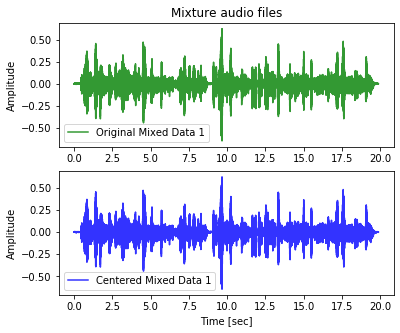

In [15]:
# Note: This cell is for explanation and testing purposes
# Show 2 wav files in plot
time = np.arange(0, (len(mixed_data1) / sample_rate1), (1 / sample_rate1))

#Show wav file on chart
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,5), sharey=True)

ax1.plot(time, mixed_data1, color="green", alpha = 0.8)
ax1.set(title='Mixture audio files', ylabel='Amplitude')
ax1.legend(['Original Mixed Data 1'])

ax2.plot(time, centered_mixed1, color="blue", alpha = 0.8)
ax2.set(xlabel='Time [sec]', ylabel='Amplitude')
ax2.legend(['Centered Mixed Data 1'])

plt.show()
plt.close(fig)

In [16]:
# Note: This cell is for explanation and testing purposes
pd.DataFrame({
    'original': mixed_data1,
    'centered': centered_mixed1
})

,original,centered
0,0.000885,0.000959
1,0.000854,0.000928
2,0.000793,0.000867
3,0.000702,0.000775
4,0.000580,0.000653
...,...,...
877144,-0.002106,-0.002032
877145,-0.001984,-0.001910
877146,-0.001923,-0.001849
877147,-0.001862,-0.001788


## Stack mixed data vertically

In [17]:
mixed_data_stack = np.vstack((centered_mixed1, centered_mixed2))
mixed_data_stack

array([[ 0.00095857,  0.00092805,  0.00086702, ..., -0.00184905,
        -0.00178801, -0.00178801],
       [ 0.00040465,  0.00037414,  0.00025206, ..., -0.00078553,
        -0.00075502, -0.00075502]])

The next 3 cells will illustrate the output of vertically stacking the 2 mixed data.

In [18]:
# Note: This cell is for explanation and testing purposes
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


In [19]:
# # Note: This cell is for explanation and testing purposes
pd.DataFrame([3,2,1])

,0
0,3
1,2
2,1


In [20]:
# Note: This cell is for explanation and testing purposes
pd.DataFrame(np.vstack(([1,2,3], [3,2,1])))

,0,1,2
0,1,2,3
1,3,2,1


## Whiten mixed data stack
**Whitening** is an operation that removes all linear dependencies in a data set and normalizes the variance along all dimensions.

In [21]:
def whitening_process(mixed_signal_matrix):
    """ Whitening is an operation that removes all linear dependencies in a data set
    and normalizes the variance along all dimensions.

    Args:
        mixed_signal_matrix (numpy.ndarray): non whitened matrix which includes mixed sound datas.
    Returns:
        whitened_matrix     (numpy.ndarray): the matrix that linear dependencies deleted matrix.
    """
    covariance_matrix = np.cov(mixed_signal_matrix)
    eigen_value, eigen_vector = np.linalg.eigh(covariance_matrix)
    diagonal_matrix = np.diag(eigen_value)
    invert_square_root = np.sqrt(np.linalg.pinv(diagonal_matrix))
    whiten_transformation = np.dot(eigen_vector, np.dot(invert_square_root, np.transpose(eigen_vector)))
    whitened_matrix = np.dot(whiten_transformation, mixed_signal_matrix)
    return whitened_matrix

In [22]:
whitened_data = whitening_process(mixed_data_stack)
whitened_data

array([[ 0.02007549,  0.01962606,  0.01938372, ..., -0.03867145,
        -0.0374443 , -0.0374443 ],
       [-0.00024982, -0.00068034, -0.00305898, ...,  0.00035827,
         0.00046052,  0.00046052]])

The next few sections will explain the contents of the `whitening_process()`

### np.cov(mixed_signal_matrix)


#### Given

Given two mixed audio files

$$
A = \begin{bmatrix}
1.0 & 2.0 & 3.0 \\
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
3.0 & 2.0 & 1.0 \\
\end{bmatrix}
$$

or given a mixed signal

$$
X = 
\begin{bmatrix}
1 & 2 & 3 \\
3 & 2 & 1 \\
\end{bmatrix}
$$

In [23]:
A = [1.0, 2.0, 3.0]
B = [3.0, 2.0, 1.0]
X = np.vstack((A, B))
N = X.shape[1]

In [24]:
print(f'A = {A}')
print(f'B = {B}')
print(f'N = {N}')
print(f'X = ')

A = [1.0, 2.0, 3.0]
B = [3.0, 2.0, 1.0]
N = 3
X = 


In [25]:
pd.DataFrame(X)

,0,1,2
0,1.0,2.0,3.0
1,3.0,2.0,1.0


#### Expected output

expected output of np.cov() is

$$
Conv = \begin{bmatrix}
1.0 & -1.0 \\
-1.0 & 1.0 \\
\end{bmatrix}
$$

In [26]:
np.cov(X)

array([[ 1., -1.],
       [-1.,  1.]])

#### Compute np.cov() by hand

References
* [Main Source](https://stackoverflow.com/a/21759340/2303766)
* [Supplementary](https://jamesmccaffrey.wordpress.com/2017/11/03/example-of-calculating-a-covariance-matrix/)

In [27]:
X_tmp = X
X_tmp

array([[1., 2., 3.],
       [3., 2., 1.]])

##### Convert X_tmp using np.column_stack()

Convert
$$
X = 
\begin{bmatrix}
1.0 & 2.0 & 3.0 \\
3.0 & 2.0 & 1.0 \\
\end{bmatrix}
$$

to

$$
X\_tmp = 
\begin{bmatrix}
1.0 & 3.0 \\
2.0 & 2.0 \\
3.0 & 1.0 \\
\end{bmatrix}
$$

In [28]:
X_tmp = np.column_stack(X_tmp)
X_tmp

array([[1., 3.],
       [2., 2.],
       [3., 1.]])

##### Subtract X_tmp with each column's mean

$$
X\_tmp =
\begin{bmatrix}
1 & 3 \\
2 & 2 \\
3 & 1 \\ 
\end{bmatrix}
-
\begin{bmatrix} 2 & 2 \\\end{bmatrix}
$$

$$
X\_tmp = \begin{bmatrix}
-1.0 & 1.0 \\
0.0 & 0.0 \\
1.0 & -1.0 \\
\end{bmatrix}
$$

In [29]:
X_tmp -= X_tmp.mean(axis=0)
X_tmp

array([[-1.,  1.],
       [ 0.,  0.],
       [ 1., -1.]])

##### Compute for N - 1
$$
N = 3
$$

$$
fact = N - 1 = 2
$$

In [30]:
fact = N - 1
fact

2

##### Compute for dot matrix between transposed X_tmp and X_tmp, then divide by fact

$$
\frac{X\_tmp ^{T} \cdot{} X\_tmp}{fact}
$$

$$
= \frac{\begin{bmatrix}
-1.0 & 0.0 & 1.0 \\
1.0 & 0.0 & -1.0 \\
\end{bmatrix} \cdot
\begin{bmatrix}
-1.0 & 1.0 \\
0.0 & 0.0 \\
1.0 & -1.0 \\
\end{bmatrix}}{2}
$$

$$
= \frac{\begin{bmatrix}
2.0 & -2.0 \\
-2.0 & 2.0 \\
\end{bmatrix}}{2}
$$

$$
= \begin{bmatrix}
1.0 & -1.0 \\
-1.0 & 1.0 \\
\end{bmatrix}
$$

In [31]:
by_hand = np.dot(X_tmp.T, X_tmp.conj()) / fact
by_hand

array([[ 1., -1.],
       [-1.,  1.]])

### np.linalg.eigh(covariance_matrix)

## FastICA

In [ ]:
def get_independent_components(whitened_data):
	weights = []
	for i in range(whitened_data.shape[0]):
		weight = fastica.FastICA(whitened_data, weights)
		weights.append(weight)
	weights = np.vstack(weights)
	independent_components = np.dot(weights, whitened_data)
	return independent_components

In [ ]:
independent_components = get_independent_components(whitened_data)

In [ ]:
# Note: This cell is for explanation and testing purposes
# Show 2 wav files in plot
x = np.arange(0, (len(mixed_data1) / sample_rate1), (1 / sample_rate1))

#Show wav file on chart
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(6,5), sharey=True)
fig.suptitle('Mixed & Separated audio files')

ax1[0].plot(x, mixed_data1, color="green", alpha = 0.8)
ax1[0].set(ylabel='Amplitude')
ax1[0].legend(['Mixed Data'])

ax1[1].plot(x, independent_components[0], color="blue", alpha = 0.8)
ax1[1].legend(['Separated'])

ax2[0].plot(x, mixed_data2, color="green", alpha = 0.8)
ax2[0].set(xlabel='Time [sec]', ylabel='Amplitude')
ax2[0].legend(['Mixed Data'])

ax2[1].plot(x, independent_components[1], color="blue", alpha = 0.8)
ax2[1].set(xlabel='Time [sec]')
ax2[1].legend(['Separated'])

plt.show()
plt.close(fig)